# Data Cleaning and Exploratory Data Analysis

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from janitor import clean_names

sns.set_theme()

## Data Cleaning and Basic Statistics

In [30]:
# last modified 07/04/2025
raw_data = pd.read_csv('data/raw_data.csv')

In [31]:
# preview data
raw_data.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Intake Date,Intake Condition,Intake Type,...,Outcome Type,Outcome Subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint,intake_duration,is_current_month
0,A615796,*TALIA,CAT,BLACK,WHITE,Female,2018-04-06,2018-10-06,NORMAL,STRAY,...,TRANSFER,SPCALA,33.786316,-118.158948,Alive on Intake,False,1,"33.7863161, -118.1589477",49.0,0
1,A638666,SAM,DOG,RED,WHITE,Male,2018-01-17,2020-01-17,NORMAL,STRAY,...,RETURN TO OWNER,WALKIN,33.786316,-118.158948,Alive on Intake,False,1,"33.7863161, -118.1589477",1.0,0
2,A691756,*SNICKERDOODLE,DOG,BLACK,BROWN,Spayed,2022-01-12,2023-06-10,NORMAL,OWNER SURRENDER,...,ADOPTION,NaN,33.785933,-118.103039,Alive on Intake,False,1,"33.78593300000001, -118.1030391",21.0,0
3,A669649,*AMBUSH,DOG,CREAM,NaN,Neutered,2020-01-22,2022-03-09,NORMAL,RETURN,...,ADOPTION,NaN,33.791683,-118.212197,Alive on Intake,False,1,"33.7916834, -118.2121968",0.0,0
4,A652817,HARLEY,DOG,BLACK,WHITE,Unknown,2018-01-01,2021-01-01,NORMAL,CONFISCATE,...,RETURN TO OWNER,MICROCHIP,33.798951,-118.212194,Alive on Intake,False,1,"33.7989506, -118.2121945",0.0,0


In [32]:
# number of obs and columns/vars
raw_data.shape

(32931, 25)

In [33]:
# info on dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32931 entries, 0 to 32930
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Animal ID          32931 non-null  object 
 1   Animal Name        19417 non-null  object 
 2   Animal Type        32931 non-null  object 
 3   Primary Color      32931 non-null  object 
 4   Secondary Color    15535 non-null  object 
 5   Sex                32931 non-null  object 
 6   DOB                28758 non-null  object 
 7   Intake Date        32931 non-null  object 
 8   Intake Condition   32931 non-null  object 
 9   Intake Type        32931 non-null  object 
 10  Intake Subtype     32493 non-null  object 
 11  Reason for Intake  2134 non-null   object 
 12  Outcome Date       32620 non-null  object 
 13  Crossing           32931 non-null  object 
 14  Jurisdiction       32930 non-null  object 
 15  Outcome Type       32605 non-null  object 
 16  Outcome Subtype    292

In [34]:
# descriptive stats (exluding NA values)
raw_data.describe()

,latitude,longitude,was_outcome_alive,intake_duration,is_current_month
count,32931.000000,32931.000000,32931.000000,32620.000000,32931.000000
mean,33.814675,-118.150376,0.793295,19.052667,0.012572
std,0.154676,0.500040,0.404948,48.272103,0.111418
min,19.297815,-122.695911,0.000000,0.000000,0.000000
25%,33.783990,-118.191074,1.000000,0.000000,0.000000
50%,33.806783,-118.173446,1.000000,5.000000,0.000000
75%,33.850842,-118.129694,1.000000,17.000000,0.000000
max,45.521885,-73.992360,1.000000,1410.000000,1.000000


In [35]:
# clean/rename columns
raw_data = clean_names(raw_data)

In [36]:
# save cleaned names for later use
column_names = raw_data.columns

In [44]:
# map 'intake_is_dead' to integers (0 or 1)
raw_data['intake_is_dead'] = raw_data['intake_is_dead'].mask(
    raw_data['intake_is_dead'] == 'Alive on Intake', 0
)

In [47]:
# handle dtypes
raw_data['dob'] = pd.to_datetime(raw_data['dob'])
raw_data['intake_date'] = pd.to_datetime(raw_data['intake_date'])
raw_data['outcome_date'] = pd.to_datetime(raw_data['outcome_date'])

raw_data = raw_data.astype(
    {
        'animal_type': 'category',
        'primary_color': 'category',
        'secondary_color': 'category',
        'sex': 'category',
        'intake_condition': 'category',
        'intake_type': 'category',
        'intake_subtype': 'category',
        'reason_for_intake': 'category',
        'jurisdiction': 'category',
        'outcome_type': 'category',
        'outcome_subtype': 'category',
        'intake_is_dead': 'bool',
        'was_outcome_alive': 'bool',
        'is_current_month': 'bool',
    }
)

In [49]:
# make copy of (now) cleaned data
data = raw_data.copy()

In [50]:
# number of unique values per column
for col in data.columns:
    print('{0}: {1}'.format(col, data[col].nunique()))

animal_id: 31787
animal_name: 9873
animal_type: 10
primary_color: 82
secondary_color: 45
sex: 5
dob: 5938
intake_date: 3130
intake_condition: 16
intake_type: 12
intake_subtype: 23
reason_for_intake: 55
outcome_date: 3114
crossing: 17211
jurisdiction: 26
outcome_type: 18
outcome_subtype: 251
latitude: 10198
longitude: 10100
intake_is_dead: 1
outcome_is_dead: 2
was_outcome_alive: 2
geopoint: 10453
intake_duration: 394
is_current_month: 2


In [51]:
# percentage of missing values per column
for col in data.columns:
    print('{0}: {1}'.format(col, (data[col].isna().sum() / data.shape[0])))

animal_id: 0.0
animal_name: 0.4103732045792718
animal_type: 0.0
primary_color: 0.0
secondary_color: 0.5282560505298959
sex: 0.0
dob: 0.12671950441832924
intake_date: 0.0
intake_condition: 0.0
intake_type: 0.0
intake_subtype: 0.013300537487473809
reason_for_intake: 0.9351978379034952
outcome_date: 0.009443988946585284
crossing: 0.0
jurisdiction: 3.036652394400413e-05
outcome_type: 0.009899486805745346
outcome_subtype: 0.11123257720688713
latitude: 0.0
longitude: 0.0
intake_is_dead: 0.0
outcome_is_dead: 0.0
was_outcome_alive: 0.0
geopoint: 0.0
intake_duration: 0.009443988946585284
is_current_month: 0.0


In [23]:
# num of animals per type
raw_data['animal_type'].value_counts()

animal_type
CAT           15754
DOG           10408
BIRD           2396
OTHER          1643
WILD           1552
RABBIT          615
REPTILE         361
GUINEA PIG      188
LIVESTOCK        12
AMPHIBIAN         2
Name: count, dtype: int64

## Visual EDA

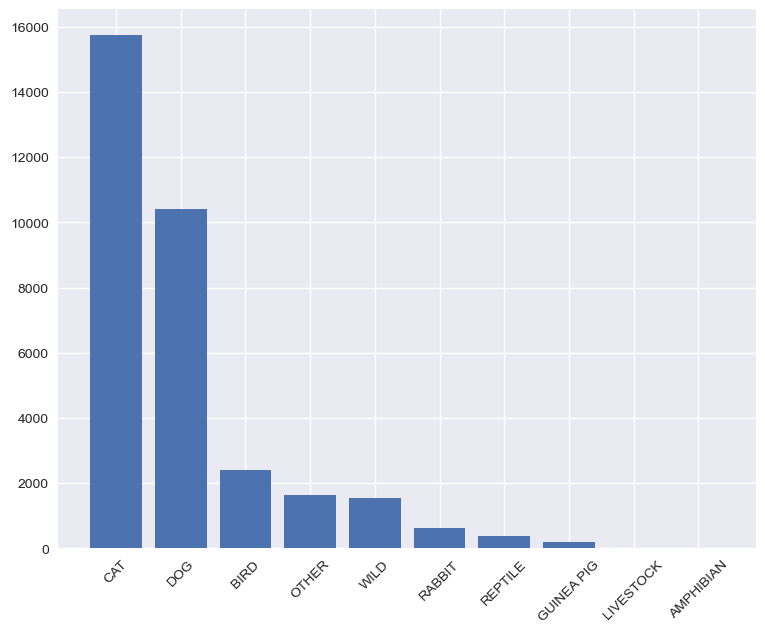

In [75]:
animal_type_count = data['animal_type'].value_counts()

fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(animal_type_count.index, animal_type_count)
ax.tick_params('x', rotation=45)
plt.show()

C:\Users\giova\AppData\Local\Temp\ipykernel_14476\3343217669.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by=['animal_type', 'intake_type']).agg({'animal_id': 'count'})


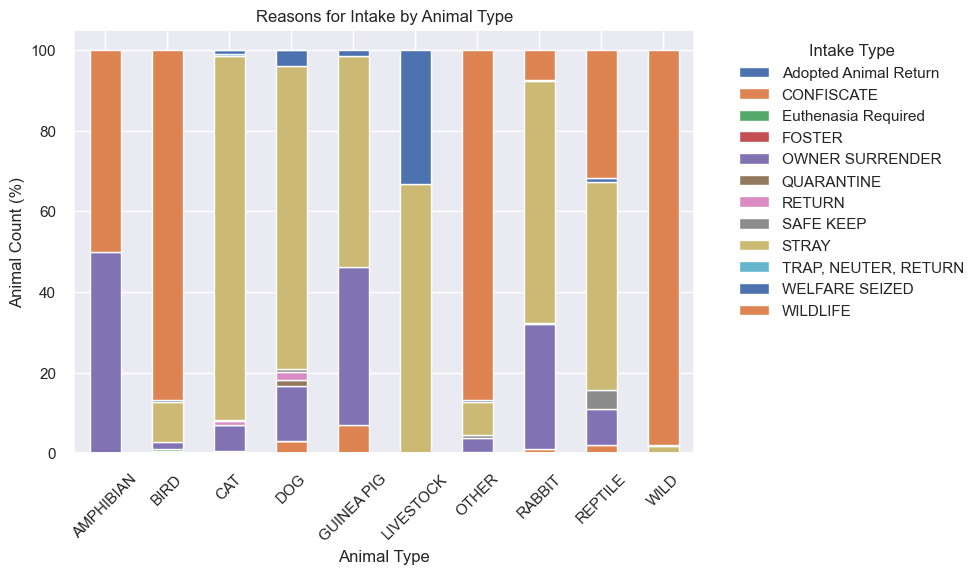

In [150]:
# intake type by animal type
grouped = data.groupby(by=['animal_type', 'intake_type']).agg({'animal_id': 'count'})
pivot = grouped.reset_index().pivot(
    columns='intake_type', index='animal_type', values='animal_id'
)
percentages = pivot.div(pivot.sum(axis=1), axis=0) * 100

# plot
ax = percentages.plot(kind='bar', stacked=True)
ax.set_title('Reasons for Intake by Animal Type')
ax.set_xlabel('Animal Type')
ax.set_ylabel('Animal Count (%)')
ax.legend(title='Intake Type', bbox_to_anchor=(1.05, 1), loc="upper left")
ax.tick_params('x', rotation=45)
plt.show()